### Imports

In [91]:
from halo import halo
import json
import ast
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Choose Mode

Select which mode to look at

In [109]:
mode = ['1v1',
        '2v2',
        '3v3'][2]

### Important Variables

In [49]:
halo_class = halo('ranks.csv')
ranks = ['Bronze',
         'Silver',
         'Gold',
         'Platinum',
         'Diamond',
         'Onyx',
        'Champion']

### Main Loop

In [110]:
# Will hold all the data for anyone who has a rank
output = []
# Curious as to how many aren't ranked. It also allowed me to check my loop
Nonecount = 0

for itm in halo_class.data[mode]:
    # Making sure it isn't np.nan
    if isinstance(itm,str):
        item = ast.literal_eval(itm)
        rank = item[0]['Csr']['Tier']
        # Making sure they have a rank
        if rank != None:
            output.append(item[0])
        else:
            Nonecount += 1
    else:
        Nonecount += 1

### Rank Distribution

In [111]:
ranksDic = dict()
for itm in output:
    rankNum = itm['Csr']['Designation']
    rank = ranks[rankNum-1]
    try:
        ranksDic[rank] += 1
    except KeyError:
        ranksDic[rank] = 1

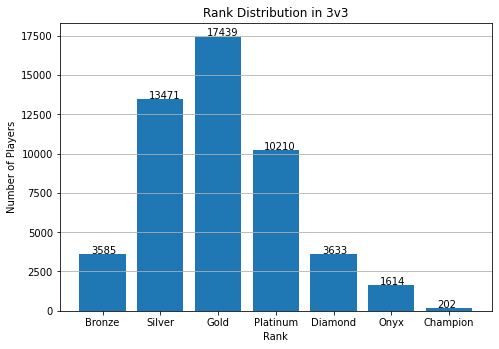

In [112]:
# Defining the plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# Data
months = [*ranks]
data = []
for itm in ranks:
    data.append(ranksDic[itm])
ax.bar(months,data)

# Annotating the bar plot with the values
for i in range(len(data)):
    plt.annotate(data[i], (i-0.2, data[i]+30))


# Set labels
ax.set_title("Rank Distribution in {}".format(mode))
ax.set_xlabel('Rank')
ax.set_ylabel('Number of Players')
ax.grid(True,axis='y')

# Saving the plot as a 'png'
plt.savefig(mode + '.jpg', dpi=300, bbox_inches='tight')

In [69]:
print(*ranks)

Bronze Silver Gold Platinum Diamond Onyx Champion
